# Student 

## Name: Chong Kit Sang 
## Student ID: 19005168g

# Fully-Connected Neural Nets

In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.

In addition to implementing fully-connected networks of arbitrary depth, we will also introduce Dropout as a regularizer and Batch/Layer Normalization as a tool to more efficiently optimize deep networks.
  

In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from comp.classifiers.fc_net import *
from comp.data_utils import get_CIFAR10_data
from comp.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from comp.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Affine layer: foward (10 pts)
Open the file `comp/layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [3]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769847728806635e-10


# Affine layer: backward (10 pts)
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [4]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward (5 pts)
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [5]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward (5 pts)
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [6]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


## Inline Question 1 (10 pts): 

We've only asked you to implement ReLU, but there are a number of different activation functions that one could use in neural networks, each with its pros and cons. In particular, an issue commonly seen with activation functions is getting zero (or close to zero) gradient flow during backpropagation. Which of the following activation functions have this problem? If you consider these functions in the one dimensional case, what types of input would lead to this behaviour?
1. Sigmoid
2. ReLU
3. Leaky ReLU

## Answer:

### 1. Sigmoid  Advantage:
Smooth Gradient which prevent jumps in output value. The output value bound between 0 and 1 and also normalize the output of each neruron. The clear Predication for x above 2 or below -2 which tends to bring the Y value (the prediction) to the edge of the curve, very close to 1 or 0. This activate method enables clear predictions. 
###  1. Sigmoid Disadvantage:
Smooth Gradient is easliy has Vanishing gradient issue for very high or very low values of X.There is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction. The Outputs of Sigmoid is not zero centered. This activate method is computationally expensive


### 2. ReLu Advantage:
The ReLu activate method is computationally efficient that allows the network to converge very quickly. The ReLu is non-linear which although it looks like a linear function, ReLU has a derivative function and allows for backpropagation.
### 2. ReLu Disadvantage:
The Dying ReLU problem—when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.


### 3. Leaky ReLu Advantage:
Leaky ReLu Method used to solve dying ReLU problem which this variation of ReLU has a small positive slope in the negative area. So it does enable backpropagation, even for negative input values Otherwise like ReLU.
### 3. Leaky ReLu Disadvantage:
The output of Leaky ReLu not consistent in leaky ReLU does not provide consistent predictions for negative input values.


### Gradient close to zero
The gradient close to zero during backpropagation to the initial layer that the gradient decreases exponentially (call Vanishing gradient problem). This behavior easy to happen with Sigmoid function which squishes a large input space into a small input space between 0 and 1. So, the large change in the input of the sigmoid function will cause a small change in output. In the more layers of the neural networks, it can cause the gradient to be too small for training to work effectively.
The ReLu and Leaky ReLu can solve vanishing gradient problem.


# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `comp/layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [7]:
from comp.layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  6.750562121603446e-11
dw error:  8.162015570444288e-11
db error:  7.826724021458994e-12


# Loss layers: Softmax
we'll give Softmax to you for free here. You should still make sure you understand how they work by looking at the implementations in `comp/layers.py`.

You can make sure that the implementations are correct by running the following:

In [8]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302545844500738
dx error:  9.384673161989355e-09


# Two-layer network (10 pts)
Now that, at this point, you have implemented modular versions of the necessary layers, you will reimplement the two layer network using these modular implementations.

Open the file `comp/classifiers/fc_net.py` and complete the implementation of the `TwoLayerNet` class. This class will serve as a model for the other networks you will implement in this assignment, so read through it to make sure you understand the API. You can run the cell below to test your implementation.

In [9]:
np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

# Errors should be around e-7 or less
for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = ', reg)
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
W1 relative error: 1.52e-08
W2 relative error: 3.48e-10
b1 relative error: 6.55e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 3.12e-07
W2 relative error: 7.98e-08
b1 relative error: 1.56e-08
b2 relative error: 7.76e-10


# Solver (5 pts)
Following our modular design, for this assignment we have split the logic for training models into a separate class.

Open the file `comp/solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `50%` accuracy on the validation set.
Please print out the best val acc of your model.

In [10]:
#model = TwoLayerNet()
solver = None
lr = 1e-3
best_val = -1
hidden_size = 100
weight_scale = 1e-3
##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################
model = TwoLayerNet(input_dim=3*32*32, hidden_dim= 100, num_classes= 10, weight_scale=weight_scale , reg =0.3)
cur_solver = Solver(model, data, update_rule='sgd', optim_config={'learning_rate':lr}, 
                        lr_decay=0.95, num_epochs=10,batch_size=200, print_every=500)
# cur_solver = Solver(model, data, update_rule='sgd', optim_config={'learning_rate':lr}, 
#                         lr_decay=0.95, num_epochs=10,batch_size=100, print_every=100, verbose=False)
cur_solver.train()

val_accuracy = cur_solver.best_val_acc
if best_val < val_accuracy:
    best_val = val_accuracy
    solver = cur_solver
    # Print results
print('lr %e reg %e hid %d  val accuracy: %f' % (
                lr, reg, hidden_size, val_accuracy))
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 2450) loss: 2.352111
(Epoch 0 / 10) train acc: 0.114000; val_acc: 0.096000
(Epoch 1 / 10) train acc: 0.406000; val_acc: 0.413000
(Epoch 2 / 10) train acc: 0.483000; val_acc: 0.459000
(Iteration 501 / 2450) loss: 1.522021
(Epoch 3 / 10) train acc: 0.479000; val_acc: 0.467000
(Epoch 4 / 10) train acc: 0.528000; val_acc: 0.509000
(Iteration 1001 / 2450) loss: 1.538253
(Epoch 5 / 10) train acc: 0.520000; val_acc: 0.513000
(Epoch 6 / 10) train acc: 0.510000; val_acc: 0.503000
(Iteration 1501 / 2450) loss: 1.461614
(Epoch 7 / 10) train acc: 0.540000; val_acc: 0.503000
(Epoch 8 / 10) train acc: 0.547000; val_acc: 0.501000
(Iteration 2001 / 2450) loss: 1.396007
(Epoch 9 / 10) train acc: 0.575000; val_acc: 0.515000
(Epoch 10 / 10) train acc: 0.585000; val_acc: 0.515000
lr 1.000000e-03 reg 7.000000e-01 hid 100  val accuracy: 0.515000


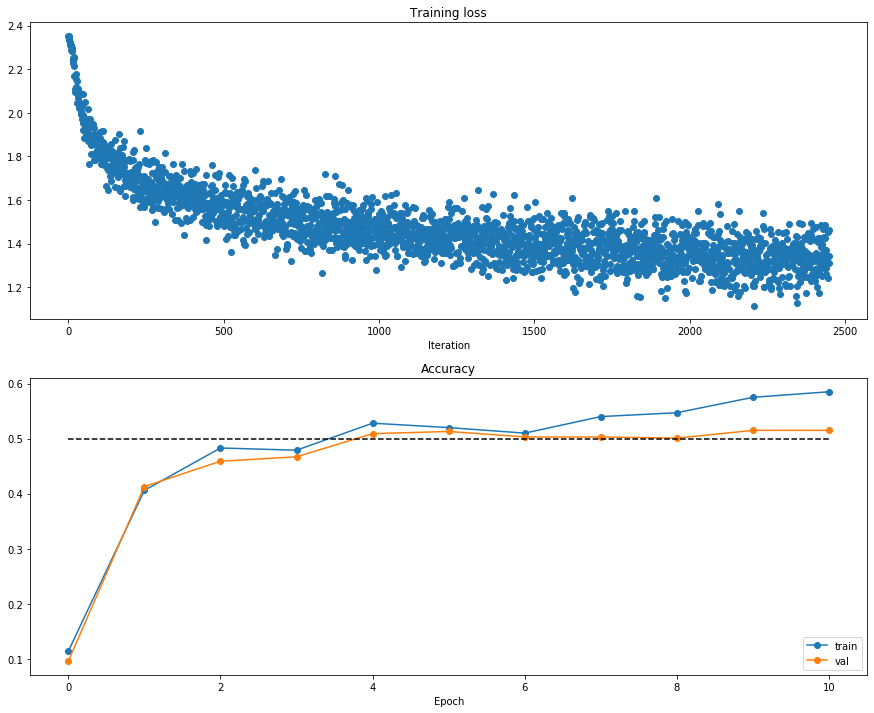

In [11]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network (30 pts)
Next you will implement a fully-connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `comp/classifiers/fc_net.py`.

Implement the initialization, the forward pass, and the backward pass. 

## Initial loss and gradient check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?

For gradient checking, you should expect to see errors around 1e-7 or less.

In [12]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss)
  
  # Most of the errors should be on the order of e-7 or smaller.   
  # NOTE: It is fine however to see an error for W2 on the order of e-5
  # for the check when reg = 0.0
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.3004790897684924
W1 relative error: 1.48e-07
W2 relative error: 2.21e-05
W3 relative error: 3.53e-07
b1 relative error: 5.38e-09
b2 relative error: 2.09e-09
b3 relative error: 5.80e-11
Running check with reg =  3.14
Initial loss:  7.052114776533016
W1 relative error: 7.36e-09
W2 relative error: 6.87e-08
W3 relative error: 3.48e-08
b1 relative error: 1.48e-08
b2 relative error: 1.72e-09
b3 relative error: 1.80e-10


As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. In the following cell, tweak the learning rate and initialization scale to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 3.604568
(Epoch 0 / 20) train acc: 0.220000; val_acc: 0.121000
(Epoch 1 / 20) train acc: 0.360000; val_acc: 0.130000
(Epoch 2 / 20) train acc: 0.640000; val_acc: 0.173000
(Epoch 3 / 20) train acc: 0.780000; val_acc: 0.199000
(Epoch 4 / 20) train acc: 0.900000; val_acc: 0.190000
(Epoch 5 / 20) train acc: 0.900000; val_acc: 0.194000
(Iteration 11 / 40) loss: 0.189322
(Epoch 6 / 20) train acc: 0.900000; val_acc: 0.187000
(Epoch 7 / 20) train acc: 0.940000; val_acc: 0.187000
(Epoch 8 / 20) train acc: 0.960000; val_acc: 0.186000
(Epoch 9 / 20) train acc: 1.000000; val_acc: 0.183000
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.175000
(Iteration 21 / 40) loss: 0.081366
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.179000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.180000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.176000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.170000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.174000
(Iteration 31 / 40) loss: 

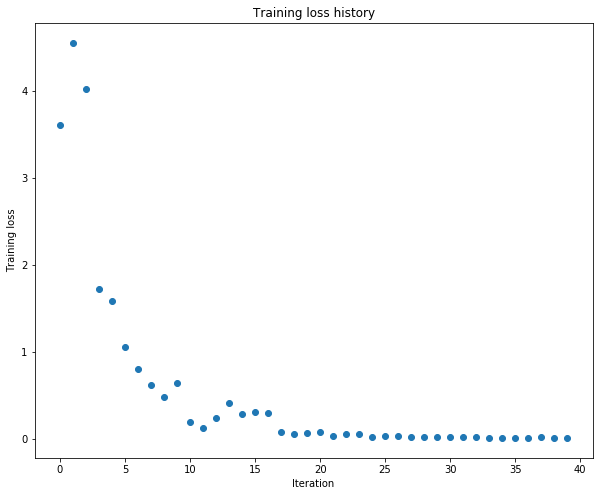

In [13]:
# TODO: Use a three-layer Net to overfit 50 training examples by 
# tweaking just the learning rate and initialization scale.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

# Obtained with random search, can change both weight_scale and learning rate
weight_scale = 2e-2 #5e-5
learning_rate = 1e-2#5e-5
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again you will have to adjust the learning rate and weight initialization, but you should be able to achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 3.074586
(Epoch 0 / 20) train acc: 0.280000; val_acc: 0.107000
(Epoch 1 / 20) train acc: 0.240000; val_acc: 0.102000
(Epoch 2 / 20) train acc: 0.540000; val_acc: 0.151000
(Epoch 3 / 20) train acc: 0.540000; val_acc: 0.107000
(Epoch 4 / 20) train acc: 0.360000; val_acc: 0.121000
(Epoch 5 / 20) train acc: 0.820000; val_acc: 0.147000
(Iteration 11 / 40) loss: 1.104812
(Epoch 6 / 20) train acc: 0.880000; val_acc: 0.158000
(Epoch 7 / 20) train acc: 0.860000; val_acc: 0.153000
(Epoch 8 / 20) train acc: 0.940000; val_acc: 0.182000
(Epoch 9 / 20) train acc: 0.940000; val_acc: 0.171000
(Epoch 10 / 20) train acc: 0.980000; val_acc: 0.177000
(Iteration 21 / 40) loss: 0.376460
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.172000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.184000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.183000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.175000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.184000
(Iteration 31 / 40) loss: 

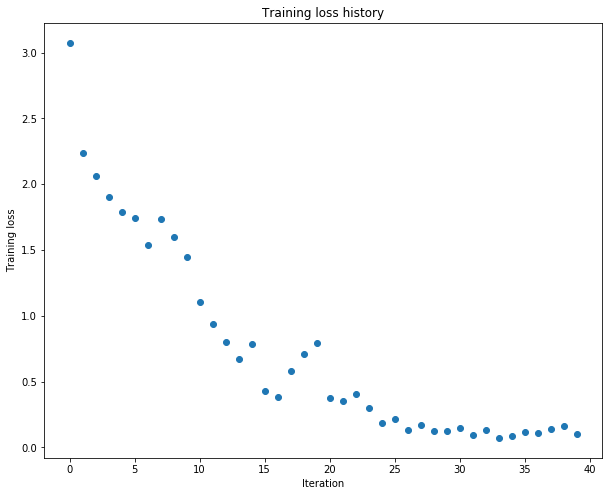

In [14]:
# TODO: Use a five-layer Net to overfit 50 training examples by 
# tweaking just the learning rate and initialization scale.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}


#Test without dropout and normalization  
# learning_rate = 5e-4  #(without dropout and normal)
# weight_scale =  1e-1  #(without dropout and normal)
# model = FullyConnectedNet([100, 100, 100, 100],
#                 weight_scale=weight_scale, dtype=np.float64 )

# Test with dropout and normalization 
# Obtained with random search
# learning_rate = 1e-1# (dropout and normal =batchnrom)
# weight_scale = 1e-1 # ( dropout and normal =batchnrom)
learning_rate = 1.5e-1# (dropout and normal =layernrom)
weight_scale = 1.5e-1 # ( dropout and normal =layernorm)
droppout =  0.98 #0~1
normalization = "layernorm"  #"batchnorm" or "layernorm"

model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=weight_scale, dtype=np.float64, dropout=droppout, normalization=normalization)

solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

## Inline Question 2 (15 pts): 
Did you notice anything about the comparative difficulty of training the three-layer net vs training the five layer net? In particular, based on your experience, which network seemed more sensitive to the initialization scale? Why do you think that is the case?

## Answer:
5 layer parameter tuning is very sensitive with a change of weight_scale value than learning rate that will make more loss in function. I think the 5 layers with more neuron in-network is more complex to the optimal the initialization parameter than 3 layers neural network.

## Inline Question 3 (Bonus 20 pts): 
implement the dropout and batch/ layer norm version of multilayer networks and try to discuss the effect of switching on `dropout` and `batch/layer norm`.

## Answer:
I use dropout the error rate can improve when the value between 0.9 to 0.99. If the dropout below 0.8 , the error rate become poor performance than 0.9 to 0.99. 
The layer normalization method  can achieve lower error rate than batch normalization that meaning the layer normalization can further improve the performance.